# AI534 Implementation 1###
**Deadline**: Sunday, Oct. 13, by 11:59pm

**Submission**: Submit 1) your completed notebook in ipynb format, and 2) a PDF export of the completed notebook with outputs (the codeblock at the end of the notebook should automatically produce the pdf file).

In this assignment, we will implement and experiment linear regression to predict the price of a house based on features describing the house, using the housing data that you have explored in the warm up assignment.

We will implement two versions, one using the closed-form solution, and one using gradient descent.

You may modify the starter code as you see fit, including changing the signatures of functions and adding/removing helper functions. However, please make sure that your TA can understand what you are doing and why.

Team : IA1 14

Members: Hyuntaek Oh, Woonki Kim

Email: ohhyun@oregonstate.edu, kimwoon@oregonstate.edu

First lets import the necessary packages.

In [108]:
!pip install nbconvert > /dev/null 2>&1
!pip install pdfkit > /dev/null 2>&1
!apt-get install -y wkhtmltopdf > /dev/null 2>&1
import os
import pdfkit
import contextlib
import sys
from google.colab import files
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# add more imports if necessary

# Part 0: (5 pts) data and preprocessing

---

On canvas, we have provided two different data files for this assignment: ia1_train.csv (for training) and ia1_val.csv(for validation). Download them and upload them to your google drive. Then mount the google drive from your google colab notebook:


In [109]:
from google.colab import drive
drive.mount('/content/gdrive')

train_path = '/content/gdrive/My Drive/AI534/ia1_train.csv' # DO NOT MODIFY THIS. Please make sure your data has this exact path
val_path = '/content/gdrive/My Drive/AI534/ia1_val.csv' # DO NOT MODIFY THIS. Please make sure your data has this exact path

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Now load the training and validation data.

In [110]:
# your code goes here

In [111]:
train_data = pd.read_csv(train_path)
val_data = pd.read_csv(val_path)

In [112]:
train_data

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7972604355,5/21/2014,3,1.00,1020,7874,1.0,0,0,3,...,1020,0,1956,0,98106,47.5175,-122.346,1290,7320,2.1800
1,8731951130,6/9/2014,3,2.25,2210,8000,2.0,0,0,4,...,2210,0,1969,0,98023,47.3085,-122.381,1990,8000,2.5025
2,7885800740,2/18/2015,4,2.50,2350,5835,2.0,0,0,3,...,2350,0,2003,0,98042,47.3494,-122.153,3010,5772,2.7000
3,4232900940,5/22/2014,3,1.50,1660,4800,2.0,0,0,3,...,1660,0,1907,0,98119,47.6352,-122.358,1690,4000,9.2630
4,3275850190,9/5/2014,3,2.50,2410,9916,2.0,0,0,4,...,2410,0,1989,0,98052,47.6911,-122.103,2310,8212,7.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,4222500410,2/26/2015,4,1.75,2000,7350,1.0,0,0,3,...,1100,900,1963,0,98003,47.3428,-122.303,1720,7350,2.6700
7996,1150700170,9/26/2014,4,2.25,1870,6693,2.0,0,0,3,...,1870,0,1996,0,98003,47.2774,-122.299,1650,6518,2.9900
7997,1959702045,11/19/2014,2,1.00,1240,5500,1.0,0,0,3,...,1240,0,1954,0,98102,47.6461,-122.317,2080,4400,9.0000
7998,7234601221,10/14/2014,3,1.50,1280,2114,1.5,0,0,3,...,1280,0,1904,0,98122,47.6174,-122.308,1540,1456,6.8750


In [113]:
val_data

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,3211200460,8/6/2014,4,1.00,1520,9800,1.5,0,0,4,...,1520,0,1971,0,98034,47.7303,-122.236,1540,7700,3.8900
1,4124000320,3/16/2015,3,2.25,1800,15903,1.0,0,0,3,...,1340,460,1986,0,98038,47.3813,-122.043,2000,15233,3.3562
2,7129302800,12/12/2014,3,1.50,1780,5000,1.0,0,4,4,...,1030,750,1958,0,98118,47.5168,-122.256,1780,7500,4.2000
3,1392800035,6/18/2014,2,1.00,1240,6400,1.0,0,1,4,...,1060,180,1938,0,98126,47.5493,-122.377,1240,6400,5.5900
4,2154900040,10/30/2014,3,2.25,2190,8834,1.0,0,0,3,...,1390,800,1987,0,98001,47.2633,-122.244,1490,8766,1.9425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,5132000140,1/20/2015,6,1.00,1370,5080,1.5,0,0,3,...,1120,250,1931,0,98106,47.5238,-122.350,1020,5080,4.1500
1996,6624010170,5/8/2014,3,1.75,1390,7399,1.0,0,0,4,...,1390,0,1975,0,98031,47.4183,-122.182,1460,7800,2.4600
1997,1853080840,2/11/2015,5,3.50,3700,7055,2.0,0,0,3,...,3700,0,2014,0,98074,47.5929,-122.057,3170,6527,8.8995
1998,2767601311,10/24/2014,3,2.50,1260,1102,3.0,0,0,3,...,1260,0,2007,0,98107,47.6750,-122.387,1320,2500,4.4500


Perform the following preprocessing steps.
1. remove the *ID* column from both training and validation data
2. change *date* into 3 numerical features *day*, *month* and *year*, like in the warm up exercise
3. The feature *yr_renovated* is set to 0 if the house has not been renovated. This creates an inconsistent meaning to the numerical values. Replace it with a new feature called *age_since_renovated*:

>if *yr_renovate* != 0
>> *age_since_renovated* = *year* - *yr\_renovated*  

>otherwise
>> *age\_since\_renovated = year - yr\_built*

4. Normalize all the feautres using z-score normalization based on the training data. Do not normalize *price* as it is the target.
To normalize a feature *x* using z-score normalization, the fomula is

>$z=\frac{x-\mu}{\sigma}$

where $\mu$ and $\sigma$ are the mean and standard deviation of $x$ respectively. The normalized feature will have zero mean and unit standard deviation. Note that you should estimate $\mu$ and $\sigma$ for each feature only using the training data and use the same $\mu$ and $\sigma$ to normalize the features for both training and validation data.




In [114]:
# Your code goes here

In [115]:
#Removing ID column
train_data_without_id = train_data.drop(columns=['id'])
val_data_without_id = val_data.drop(columns=['id'])

In [116]:
# change date into 3 numerical features day, month and year.
def convert_date_to_features(df):
  df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y')
  df['day'] = df['date'].dt.day
  df['month'] = df['date'].dt.month
  df['year'] = df['date'].dt.year
  df.drop(columns=['date'], inplace=True)


convert_date_to_features(train_data_without_id)
convert_date_to_features(val_data_without_id)

In [117]:
#Replacing feature yr_renovated to new feature age_since_renovated
def age_since_renovated(df):
  for index, row in df.iterrows():
    if row['yr_renovated'] != 0:
      row['year'] - row['yr_renovated']
      df.at[index, 'age_since_renovated'] = row['year'] - row['yr_renovated']
    else :
      row['year'] - row['yr_built']
      df.at[index, 'age_since_renovated'] = row['year'] - row['yr_built']
  df = df.drop(columns=['yr_renovated'], inplace = True)

age_since_renovated(train_data_without_id)
age_since_renovated(val_data_without_id)

In [118]:
# Calculate the mean and standard deviation for each column
mean_values = train_data_without_id.drop('price', axis=1).mean()
std_values = train_data_without_id.drop('price', axis=1).std()

In [119]:
#Normalize all the feautres using z-score normalization based on the training data
norm_train=(train_data_without_id.drop('price', axis=1)-mean_values)/std_values
norm_train['price']=train_data_without_id['price']
norm_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,zipcode,lat,long,sqft_living15,sqft_lot15,day,month,year,age_since_renovated,price
0,-0.388520,-1.465613,-1.159110,-0.171139,-0.922332,-0.082432,-0.304487,-0.634184,-0.563015,-0.924206,...,0.512279,-0.308988,-0.932779,-1.018504,-0.185644,0.600423,-0.513736,-0.682211,0.587803,2.1800
1,-0.388520,0.169158,0.145003,-0.168133,0.917732,-0.082432,-0.304487,0.888924,0.290361,0.507090,...,-1.040633,-1.816632,-1.179633,0.004058,-0.162508,-0.793714,-0.193377,-0.682211,0.137857,2.5025
2,0.649956,0.496112,0.298428,-0.219787,0.917732,-0.082432,-0.304487,-0.634184,0.290361,0.675478,...,-0.685148,-1.521596,0.428443,1.494077,-0.238313,0.251889,-1.474814,1.465639,-1.004315,2.7000
3,-0.388520,-0.811705,-0.457738,-0.244481,0.917732,-0.082432,-0.304487,-0.634184,0.290361,-0.154433,...,0.755506,0.540053,-1.017415,-0.434182,-0.298603,0.716601,-0.513736,-0.682211,2.283754,9.2630
4,-0.388520,0.496112,0.364182,-0.122419,0.917732,-0.082432,-0.304487,0.888924,1.997115,0.747644,...,-0.498050,0.943294,0.781091,0.471515,-0.155295,-1.258427,0.767701,-0.682211,-0.554368,7.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,0.649956,-0.484751,-0.085134,-0.183641,-0.922332,-0.082432,-0.304487,-0.634184,-0.563015,-0.827984,...,-1.414829,-1.569205,-0.629502,-0.390358,-0.184623,1.181313,-1.474814,1.465639,0.380135,2.6700
7996,0.649956,0.169158,-0.227600,-0.199316,0.917732,-0.082432,-0.304487,-0.634184,-0.563015,0.098149,...,-1.414829,-2.040975,-0.601290,-0.492615,-0.212931,1.181313,0.767701,-0.682211,-0.796647,2.9900
7997,-1.426996,-1.465613,-0.918013,-0.227780,-0.922332,-0.082432,-0.304487,-0.634184,-0.563015,-0.659596,...,0.437439,0.618681,-0.728243,0.135531,-0.284994,0.368067,1.408420,-0.682211,0.657025,9.0000
7998,-0.388520,-0.811705,-0.874177,-0.308567,-0.002300,-0.082432,-0.304487,-0.634184,0.290361,-0.611485,...,0.811635,0.411651,-0.664767,-0.653303,-0.385160,-0.212824,1.088060,-0.682211,2.387588,6.8750


In [120]:
#Normalize all the feautres using z-score normalization based on the training data
norm_val=(val_data_without_id.drop('price', axis=1)-mean_values)/std_values
norm_val['price']=val_data_without_id['price']
norm_val

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,zipcode,lat,long,sqft_living15,sqft_lot15,day,month,year,age_since_renovated,price
0,0.649956,-1.465613,-0.611163,-0.125186,-0.002300,-0.082432,-0.304487,0.888924,-0.563015,-0.322821,...,-0.834826,1.226067,-0.156953,-0.653303,-0.172715,-1.142248,0.447342,-0.682211,0.068634,3.8900
1,-0.388520,0.169158,-0.304313,0.020425,-0.922332,-0.082432,-0.304487,-0.634184,0.290361,-0.539319,...,-0.759987,-1.291481,1.204269,0.018666,0.083587,0.019532,-1.154455,1.465639,-0.415923,3.3562
2,-0.388520,-0.811705,-0.326231,-0.239710,-0.922332,-0.082432,5.014070,0.888924,-0.563015,-0.912178,...,0.736796,-0.314038,-0.298012,-0.302710,-0.179520,-0.445180,1.728779,-0.682211,0.518580,4.2000
3,-1.426996,-1.465613,-0.918013,-0.206307,-0.922332,-0.082432,1.025152,0.888924,-0.563015,-0.876095,...,0.886474,-0.079596,-1.151421,-1.091544,-0.216946,0.251889,-0.193377,-0.682211,1.210806,5.5900
4,-0.388520,0.169158,0.123085,-0.148234,-0.922332,-0.082432,-0.304487,-0.634184,-0.563015,-0.479181,...,-1.452249,-2.142687,-0.213377,-0.726343,-0.136445,1.646026,1.088060,-0.682211,-0.485146,1.9425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2.726909,-1.465613,-0.775547,-0.237801,-0.002300,-0.082432,-0.304487,-0.634184,-1.416392,-0.803929,...,0.512279,-0.263543,-0.960991,-1.412920,-0.261857,0.484245,-1.795174,1.465639,1.487696,4.1500
1996,-0.388520,-0.484751,-0.753629,-0.182472,-0.922332,-0.082432,-0.304487,0.888924,-0.563015,-0.479181,...,-0.890955,-1.024578,0.223907,-0.770167,-0.169312,-0.909892,-0.513736,-0.682211,-0.069811,2.4600
1997,1.688433,1.803929,1.777884,-0.190679,0.917732,-0.082432,-0.304487,-0.634184,1.143738,2.299217,...,-0.086435,0.234918,1.105528,1.727805,-0.212625,-0.561358,-1.474814,1.465639,-1.385039,8.8995
1998,-0.388520,0.496112,-0.896095,-0.332712,2.757797,-0.082432,-0.304487,-0.634184,0.290361,-0.635541,...,0.530988,0.827155,-1.221951,-0.974679,-0.349639,0.948957,1.088060,-0.682211,-1.177371,4.4500


Let's do a quick testing of your normalization, please
1. Estimate and print the new mean and standard deviation of the normalized features for the training data --- this should be 0 and 1 respectively.  
2. Estimate and print the new mean and standard deviation of the normalized features for the validation data --- these values will not be 0 and 1, but somewhat close

In [121]:
# Your code goes here

In [122]:
#1. Estimate and print the new mean and standard deviation of the normalized features for the training data --- this should be 0 and 1 respectively.
print(norm_train.drop('price', axis=1).mean())
print(norm_train.drop('price', axis=1).std())

bedrooms               1.652012e-16
bathrooms             -1.634248e-16
sqft_living            9.059420e-17
sqft_lot              -1.776357e-18
floors                 4.396483e-17
waterfront             2.464695e-17
view                  -6.394885e-17
condition              6.306067e-17
grade                  1.207923e-16
sqft_above            -9.947598e-17
sqft_basement          5.329071e-18
yr_built               3.400835e-15
zipcode                3.704059e-14
lat                   -4.131451e-14
long                   9.379608e-14
sqft_living15          6.039613e-17
sqft_lot15            -1.776357e-18
day                   -2.142730e-17
month                 -2.264855e-17
year                   1.991887e-13
age_since_renovated   -9.681145e-17
dtype: float64
bedrooms               1.0
bathrooms              1.0
sqft_living            1.0
sqft_lot               1.0
floors                 1.0
waterfront             1.0
view                   1.0
condition              1.0
grade        

In [123]:
#2. Estimate and print the new mean and standard deviation of the normalized features for the validation data --- these values will not be 0 and 1, but somewhat close
print(norm_val.drop('price', axis=1).mean())
print(norm_val.drop('price', axis=1).std())

bedrooms               0.005582
bathrooms             -0.011648
sqft_living            0.013909
sqft_lot               0.005044
floors                 0.022541
waterfront             0.015265
view                   0.002659
condition             -0.055403
grade                  0.057390
sqft_above             0.028274
sqft_basement         -0.024773
yr_built               0.018428
zipcode               -0.030558
lat                   -0.018752
long                   0.016222
sqft_living15          0.051889
sqft_lot15            -0.005096
day                   -0.017296
month                 -0.017980
year                   0.009397
age_since_renovated   -0.023726
dtype: float64
bedrooms               0.893240
bathrooms              1.003430
sqft_living            0.993781
sqft_lot               0.912514
floors                 0.992549
waterfront             1.088181
view                   1.025579
condition              0.976223
grade                  1.033680
sqft_above             0.


## ***Question***
Why is it import to use the same $\mu$ and $\sigma$ to perform normalization on the training and validation data? What would happen if we use $\mu$ and $\sigma$ estimated using the validation to perform normalization on the validation data?  


**Your answer goes here:**

**To avoid poor generalization and overfitting, we need to use same mean and standard deviation to perform normalization on the training and validation data. The goal of using a validation set is to simulate how the model will perform on new data set. If we use mean and standard deviation estimated using the validation to perform normalization on the validation data, the model might not guarantee the performance since it performs poorly and less accurate when a set of new data is inserted. Moreover, training with validation data can cause to overfit on the validation data, meaning that there would be no difference (gap) between training and validation set.**

# Part 1 (15 pts) Generate closed-form solution for reference.
Our data now contains 21 numeric features, before we learn a linear regression model using gradient descent, we will first build the closed-form solution as a reference point. So for this part, you need to
1. Implement the close-form solution for linear regression and apply it to the training data to learn the weight vector for your linear regression model. For matrix inversion you can use existing numpy functions. Specifically, we recommend the numpy.linalg.pinv() function for inverting near-singular matrices.
2. Apply your learned linear regression model to the training data to make predictions for all training examples and report the Mean Squared Error.
3. Apply your learned linear regression model to the validation data to make predictions for all the validation examples and report the mean squared error for the validation data.

Your code should print the weight vector, which has 22 dimensions, one for each feature plus one additional $w_0$.  Your code should also report the MSE for the training and validation data respectively.

In [124]:
# Your code goes here

In [125]:
#1. Closed form to compute weight: w={(XX^T)^−1}X^TY
x_train = norm_train.drop('price', axis=1)
y_train = norm_train['price']

ones_column = np.ones((x_train.shape[0], 1))
x_train_with_bias = np.hstack([ones_column, x_train])


w_train = np.dot(np.linalg.pinv(np.dot(x_train_with_bias.T, x_train_with_bias)), np.dot(x_train_with_bias.T, y_train))
print(x_train_with_bias.shape)
print(w_train)

(8000, 22)
[ 5.36167284 -0.28135266  0.3390716   0.76341998  0.05815041  0.01813676
  0.3281388   0.44675376  0.1998432   1.11544343  0.75623295  0.15546155
 -0.88336171 -0.26341874  0.83661248 -0.30369641  0.14358099 -0.09927428
 -0.05063652  0.05485035  0.17375019 -0.10255779]


In [126]:
x_val = norm_val.drop('price', axis=1)
y_val = norm_val['price']

ones_column = np.ones((x_val.shape[0], 1))
x_val_with_bias = np.hstack([ones_column, x_val])

In [127]:
#2. Apply your learned linear regression model to the training data to make predictions for all training examples and report the Mean Squared Error.
n_train = x_train_with_bias.shape[0]
mse_train = (1 / n_train) * np.sum(((np.dot(x_train_with_bias, w_train) - y_train) ** 2))
print("MSE for training data:", mse_train)

MSE for training data: 3.7578870899545866


In [128]:
#3.Apply your learned linear regression model to the validation data to make predictions for all the validation examples and report the mean squared error for the validation data.
n_val = x_val_with_bias.shape[0]
mse_val = (1/n_val)*np.sum(((np.dot(x_val_with_bias, w_train) - y_val) ** 2))
print("MSE for val data:", mse_val)


MSE for val data: 4.503508105356858


## Question
The learned feature weights are often used  to understand the importance of the features. The sign of the weights indicates if a feature positively or negatively impact the price, and the magnitude suggests the strength of the impact. Does the sign of all the features match your expection based on your common-sense understanding of what makes a house expensive? Please hightlight any surprises from the results.


**Your answer goes here**

**As my expectation, it seems that the number of bedrooms have a positive impact on the price of the house, making the price expensive. Surprisingly, its weight is about 5.36, which is the highest values. On the other hand, not as much as the number of bedrooms, zipcode negatively affect the price of house, which is about -0.89.**

# Part 2 (40 pts) Implement and experiment with batch gradient descent

Your implementation should take following inputs:

1. the training data (with $d$ features and 1 target variable $y$),

2. the learning rate $\gamma$,

3. the number of iterations $T$

4. Optional convergence threshold (optional) $\epsilon_l$ for the loss or $\epsilon_g$ for the norm of the gradient

It should output:
1. the learned $d+1$ - dimensional weight vector
2. the sequence of $T$ MSE losses, one for each training epoch. You will be asked to plot the losses as a function of training epoch later.


In [129]:
# Your code goes here

In [130]:
# Implementation of batch gradient descent

def batch_gradient_descent(X, y, lr_gamma, T, epsilon_l=None, epsilon_g=None):

  n, d = X.shape
  w = np.zeros(d)
  mse_history = []

  for t in range(1,T):
    errors = np.dot(X, w) - y

    mse_loss = (1 / n) * np.sum(errors**2)
    mse_history.append(mse_loss)

    gradient = (2 / n) * np.dot(errors, X)
    w = w - (lr_gamma * gradient)

    if epsilon_g is not None and np.linalg.norm(gradient) <= epsilon_g:
      print(f'Converged at iteration {t+1} with gradient norm {np.linalg.norm(gradient)}')
      break

    if epsilon_l is not None and t > 0 and abs(mse_history[-1] - mse_history[-2]) <= epsilon_l:
      print(f'Converged at iteration {t+1} with loss change {abs(mse_history[-1] - mse_history[-2])}')
      break

  return w, mse_history

You will now experiment with the batch gradient descent algorithm with different learning rate on the provided data.

Please train your model for up to 3000 iterations using different learning rate: $\gamma=10^{-i}$, $i=0,1,...,4$. For each learning rate, you can opt to stop early if it has converged (using the convergence threshold) or diverged (the loss start to grow larger).

For each converging (not necessarily converged yet) learning rate, please compute and report the MSE of the final learned weights on the validation data.

Also please provide a plot that shows the training loss curves (MSE as a function of the # of epochs) for all the converging learning rates. Please use different colors mark different learning rates and provide proper legends for your figure.


In [131]:
# Your code goes here

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


MSE of the final learned weights on the validation data:  0.0
MSE of the final learned weights on the validation data:  4.503508105356861
MSE of the final learned weights on the validation data:  4.503498432645095
MSE of the final learned weights on the validation data:  4.525769160670072
MSE of the final learned weights on the validation data:  14.469470619134585


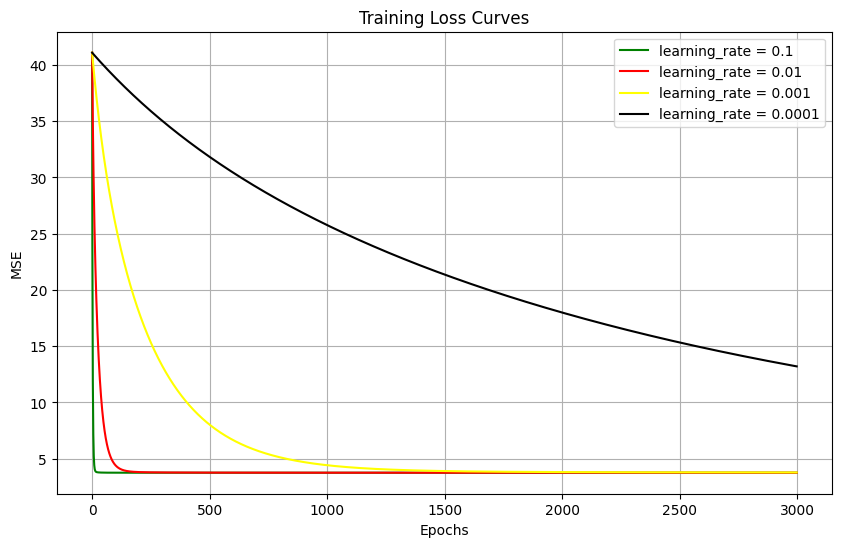

In [132]:
learning_rate = [1, 0.1, 0.01, 0.001, 0.0001]
Iterations = 3000
epsilon_l = None
epsilon_g = None

weight_set = []
history_set = []
for lr_gamma in learning_rate:
  w, mse_history = batch_gradient_descent(x_train_with_bias, y_train, lr_gamma, Iterations, epsilon_l, epsilon_g)
  weight_set.append(w)
  history_set.append(mse_history)


valid_mse_set = []
for w in weight_set:
  valid_mse_value = (1/n_val)*np.sum(((np.dot(x_val_with_bias, w) - y_val) ** 2))
  print("MSE of the final learned weights on the validation data: ", valid_mse_value)
  valid_mse_set.append(valid_mse_value)

epochs_set = []
for i in range(len(history_set)):
  epochs_set.append([x for x in range(len(history_set[i]))])


# A plot shows the training loss curves for all the converging learning rates
plt.figure(figsize=(10, 6))

# This case (learning rate = 1) is diverged.
#plt.plot(epochs_set[0], history_set[0], label="learning_rate = 1", color='blue')

plt.plot(epochs_set[1], history_set[1], label="learning_rate = 0.1", color='green')
plt.plot(epochs_set[2], history_set[2], label="learning_rate = 0.01", color='red')
plt.plot(epochs_set[3], history_set[3], label="learning_rate = 0.001", color='yellow')
plt.plot(epochs_set[4], history_set[4], label="learning_rate = 0.0001", color='black')

plt.title("Training Loss Curves")
plt.xlabel("Epochs")
plt.ylabel("MSE")

plt.legend()

plt.grid(True)
plt.show()

## Question

Which learning rate leads to the best trainng and validation MSE respectively? Do you observe better training MSE tend to correpsond to better validation MSE? How is this different from the trend shown on page 51 of the lecture slides (titled danger of using training loss to select M) regarding overfitting? Is there any issue with using training loss to pick learning rate in this case?

**The best training result shows when the learning rate is 0.1, and the best validation MSE is 4.503498xx when learning rate is 0.01, which is slightly better than when learning rate is 0.1. This means better training MSE does not tend to correspond to better validation MSE. Unlike lecture slides page 51, it seems training loss is similar to validation loss. If I use validation data for training, the results will be likely to present overfitting. One issue I have is when learning rate is 1, the training loss and weight display meaningless values and diverged.**

# Part 3. More exploration.

## **3(a). (20 pts) Normalization of features: what is the impact?**
In part 1, you were asked to perform z-score normalization of all the features. In this part, we will ask you to first conceptually think about what is the impact this operation on the solution and then use some experiments to varify your conceptual understanding.

### **Questions.**

The normalization process applies a linear transformation to each feature, where the transformed feature $x'$ is simply a linear function of original feature $x$: $x'=\frac{x-\mu}{\sigma}$.

Let's disect the influence of this transformation on our learned linear regression model.
1. How do you think this transformation will influnce the training and validation MSE we get for the closed-form solution? Why?
2. How do you think this will change the magnitude of the weights of the learned model? Why?
3. How do you think this will change the convergence behavior of the batch gradient descent algorithm? Why?

**Your answer goes here.**

**1. In my opinion, the transformation have a little or no influence on the training and validation MSE since normalization is for scaling and no difference of original shape of the function. The reason is that non-normalized features can have relatively much greater values than other smaller features, whereas normalized features are properly in the even range like [0, 1], maintaining or slightly improving the performance of training and validation**

**2. Normalization changes magnitude of the weightsof the learned model. The benefit of normalization is that all features have even range [0, 1], leading to learn uniform size of weights. If we use non-normalization, some features that has greater range of values are assigned with larger wegiths, others are assigned smaller weights relatively.**

**3. In general, if the scale of each feature is significantly different, it will negatively affect the convergence behavior of the batch gradient descent algorithm. Non-normalization can cause non-even updates of the weights, degrading the rate of convergence and making it hard to reach optimal solution. Thus, we need to use normalization for the stable rate of learning.**

Now please perform the following experiments to verify your answer to the above questions.
1. Apply closed-form solution to data that did not go through the feature normalization step, and report the learned weights and the resulting training and testing MSEs.
2. Apply gradient descent algorithm to data that did not go through the feature normalization step using different learning rate. Note that the learning rate used in previous section will no longer work here. You will need to search for an appropriate learning rate to get some converging behavior. Plot your MSE loss curve as a function of the epochs once you identify a convergent learning rate.
Hint: the learning rate needs to be much, much, much, much, much smaller (think about each much as an order of manitude) than what was used in part 2). Also unless you let it run for a long time, it is unlikely to converge to the same level of loss values. So use a upper bound on the # of iterations so that it won't take forever.

In [133]:
# Your code goes here

In [134]:
# 1.1. Apply closed-form solution to data without normalization step and
#       Report the learned weights
# 𝐰 = (𝑿𝑻𝑿)−𝟏𝑿𝑻y

def closed_form_linear_regression(X, y):
  w = np.linalg.pinv(np.transpose(X) @ X) @ np.transpose(X) @ y
  return w

non_normalized_X_train = train_data_without_id.drop(columns=['price'])
print(non_normalized_X_train)
non_normalized_X_train_biased = np.column_stack((np.ones(non_normalized_X_train.shape[0]),non_normalized_X_train))
y_train = train_data_without_id['price']
non_normalized_weight = closed_form_linear_regression(non_normalized_X_train_biased, y_train)
print("Learned weights: ", non_normalized_weight)

      bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0            3       1.00         1020      7874     1.0           0     0   
1            3       2.25         2210      8000     2.0           0     0   
2            4       2.50         2350      5835     2.0           0     0   
3            3       1.50         1660      4800     2.0           0     0   
4            3       2.50         2410      9916     2.0           0     0   
...        ...        ...          ...       ...     ...         ...   ...   
7995         4       1.75         2000      7350     1.0           0     0   
7996         4       2.25         1870      6693     2.0           0     0   
7997         2       1.00         1240      5500     1.0           0     0   
7998         3       1.50         1280      2114     1.5           0     0   
7999         3       2.25         1770      8165     2.0           0     0   

      condition  grade  sqft_above  ...  yr_built  zipcode     

In [135]:
# 1.2. Apply linear regression model to training data to make predictions for all examples
#       and report Mean Squared Error for training data

def mse(X, y, w):
  n_examples = X.shape[0]

  yhat = np.dot(X, w)
  error = yhat - y
  mse = np.sum(error**2) / n_examples

  return mse

non_normalized_train_mse = mse(non_normalized_X_train_biased, y_train, non_normalized_weight)
print("MSE for non_normalized_train: ", non_normalized_train_mse)

MSE for non_normalized_train:  3.7690052852155977


In [136]:
# 1.3. Apply linear regression model to the validation data to make predictions for all examples
#       and  report Mean Squared Error for validation data

non_normalized_X_valid = val_data_without_id.drop(columns=['price'])
non_normalized_X_valid_biased = np.column_stack((np.ones(non_normalized_X_valid.shape[0]),non_normalized_X_valid))
y_valid = val_data_without_id['price']

non_normalized_valid_mse = mse(non_normalized_X_valid_biased, y_valid, non_normalized_weight)
print("MSE for non_normalized_valid: ", non_normalized_valid_mse)

MSE for non_normalized_valid:  4.51614482629364


In [137]:
# 2.1. Apply gradient descent algorithm to data that did not go through the feature normalization step using different learning rate.
#       Note that the learning rate used in previous section will no longer work here.
#       You will need to search for an appropriate learning rate to get some converging behavior.

learning_rate = [10**(-i) for i in range(10, 15)]
Iterations = 100000
epsilon_l = None
epsilon_g = None

non_normalized_weight_set = []
non_normalized_history_set = []

for lr_gamma in learning_rate:
  non_normalized_w, non_normalized_mse_history = batch_gradient_descent(non_normalized_X_train_biased, y_train, lr_gamma, Iterations, epsilon_l, epsilon_g)
  non_normalized_weight_set.append(non_normalized_w)
  non_normalized_history_set.append(non_normalized_mse_history)

# print(non_normalized_weight_set)
# print(non_normalized_history_set)

non_normalized_valid_mse_set = []
for w in non_normalized_weight_set:
  non_normalized_valid_mse_value = mse(non_normalized_X_valid_biased, y_valid, w)
  print("MSE of the final learned weights on the non_normalized_validation data: ", non_normalized_valid_mse_value)
  non_normalized_valid_mse_set.append(non_normalized_valid_mse_value)

non_normalized_epochs_set = []
for i in range(len(non_normalized_history_set)):
  non_normalized_epochs_set.append([x for x in range(len(non_normalized_history_set[i]))])

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
<ipython-input-130-fbc1593a31bf>:16: RuntimeWarning: invalid value encountered in subtract
  w = w - (lr_gamma * gradient)


MSE of the final learned weights on the non_normalized_validation data:  0.0
MSE of the final learned weights on the non_normalized_validation data:  7.66227293149035
MSE of the final learned weights on the non_normalized_validation data:  11.26703719953302
MSE of the final learned weights on the non_normalized_validation data:  13.938957608258036
MSE of the final learned weights on the non_normalized_validation data:  14.301011354506715


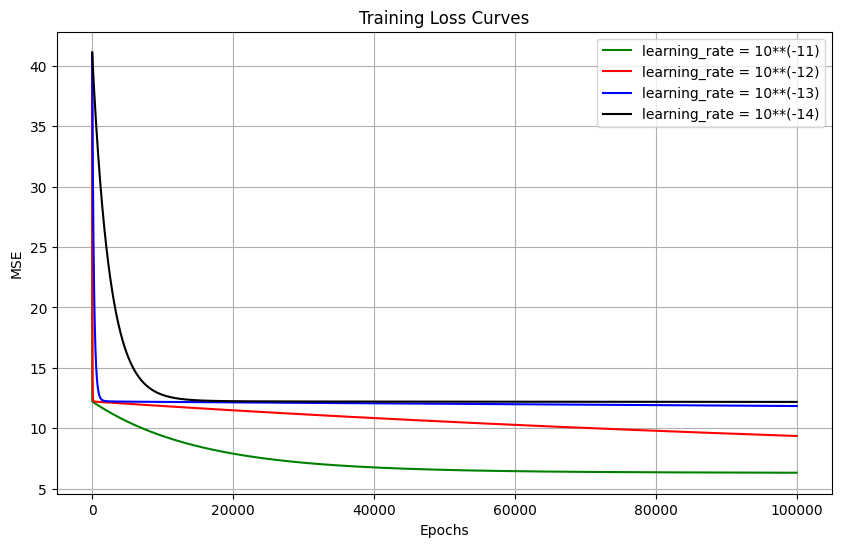

In [138]:
# 2.2. Plot your MSE loss curve as a function of the epochs once you identify a convergent learning rate.
#       Hint: the learning rate needs to be much, much, much, much, much smaller (think about each much as an order of manitude) than what was used in part 2).
#             Also unless you let it run for a long time, it is unlikely to converge to the same level of loss values.
#             So use a upper bound on the # of iterations so that it won't take forever.

plt.figure(figsize=(10, 6))

#plt.plot(non_normalized_epochs_set[0], non_normalized_history_set[0], label="learning_rate = 10**(-10)", color='purple')
plt.plot(non_normalized_epochs_set[1], non_normalized_history_set[1], label="learning_rate = 10**(-11)", color='green')
plt.plot(non_normalized_epochs_set[2], non_normalized_history_set[2], label="learning_rate = 10**(-12)", color='red')
plt.plot(non_normalized_epochs_set[3], non_normalized_history_set[3], label="learning_rate = 10**(-13)", color='blue')
plt.plot(non_normalized_epochs_set[4], non_normalized_history_set[4], label="learning_rate = 10**(-14)", color='black')


plt.title("Training Loss Curves")
plt.xlabel("Epochs")
plt.ylabel("MSE")

plt.legend()

plt.grid(True)
plt.show()

**Questions**

Please revisit the questions above. Does your experiment confirm your expectation?  Can you provide explanations to the observed differences (or lack of differences) between the normalized data and unnormalized data? Based on these observations and your understanding of them, please comment on the benefits of normalizing the input features in learning for linear regressions.


**Your answer goes here**

**Normalization slightly influenced on the training and validation MSE since the values of each case of MSE are very close to each other like training is about 3.5 and validation about 4. Normalized case showed faster convergence behaviors than non-normalized cases displayed within 3,000 iterations (non-normalized cases took much more time to converge). Even though the learning rates are small enough and the number of iterations of non-normalization cases are incredibly larger than normalized cases, the speed of learning shows that normalized cases are very fast. From these observations, we can guess that the benefit of the normalization of features is to provide faster learning for linear regression and proper performance than non-normalization.**

## **3(b). (20 pts) Explore the impact of correlated features**

In the warm up exercise, you all have seen some features are highly correlated with one another. For example, there are multiple squared footage related features that are strongly correlated (e.g., *sqft_above* and *sqrt_living* has a correlation coefficient of 0.878).  This is referred to as multicollinearity phenomeon, where two or more features are correlated.

There are numerous consequences from multicollinearity. It makes it more challenging to estimate the weights of the features accurately. The weights may become unstable, and their interpretation becomes less clear.

In this part you will work with the pre-processed training set, and perform the following experiments **using the closed-form solution**.
Specifically, your code should:

1. Create five slighly different training sets, each of which is obtained by randomly subsample 75% of the orginial training set.
2. Use the closed-form solution of linear regression to fit the model on each of the five training sets.
3. For each model, report the learned weight vector in a table.
The table should have five rows (one for each model) and a column for each feature’s weight. Include a header row to clearly label the feature names for each column.
4. Compute the variance of the learned weight coefficients across the five models for each feature. This variance will serve as a measure of the **stability** of the weight assigned to each feature.

In [139]:
# Your code goes here

In [140]:
weight_vectors = []

for i in range(5):
    df = pd.DataFrame(train_data_without_id)
    # Subsample 75% of the data
    df_subsample = df.sample(frac=0.75, random_state=i)

    # Calculate the mean and standard deviation for each column
    mean_values = df_subsample.drop('price', axis=1).mean()
    std_values = df_subsample.drop('price', axis=1).std()
    # Normalize sub samples
    norm_train_sub=(df_subsample.drop('price', axis=1)-mean_values)/std_values
    norm_train_sub['price']=df_subsample['price']

    # Extract features (X) and target (y)
    x_train = norm_train_sub.drop('price', axis=1).values
    y_train = norm_train_sub['price'].values


    ones_column = np.ones((x_train.shape[0], 1))
    x_train_with_bias = np.hstack([ones_column, x_train])

    weight = np.dot(np.linalg.pinv(np.dot(np.transpose(x_train_with_bias), x_train_with_bias)), np.dot(np.transpose(x_train_with_bias), y_train))

    weight_vectors.append(weight)


#print(weight_vectors)
weights_df = pd.DataFrame(weight_vectors, columns=['bias'] + list(df.drop('price', axis=1).columns))

print("\nWeights for each feature:\n")
weights_df


Weights for each feature:



,bias,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,day,month,year,age_since_renovated
0,5.356910,-0.283985,0.337227,0.820976,0.034697,-0.018337,0.363491,0.428266,0.170816,1.125794,...,-0.947852,-0.259537,0.848218,-0.278492,0.048997,-0.082209,-0.050031,0.050162,0.149320,-0.154635
1,5.361843,-0.235392,0.265663,0.676916,0.066376,0.062349,0.372320,0.369623,0.198685,1.242794,...,-0.935521,-0.249858,0.816451,-0.273091,0.180780,-0.085198,-0.048908,0.040763,0.175948,-0.152084
2,5.374270,-0.278849,0.356035,0.748614,0.062915,0.025501,0.221981,0.483853,0.176067,1.128752,...,-0.817744,-0.268168,0.831478,-0.336574,0.177046,-0.071696,-0.034501,0.078797,0.210726,-0.011830
3,5.352730,-0.289905,0.239916,0.725911,0.059279,0.082372,0.323469,0.449814,0.225081,1.129508,...,-0.906794,-0.284048,0.828066,-0.284687,0.206469,-0.095815,-0.066692,0.044495,0.180368,-0.152579
4,5.333906,-0.262785,0.346543,0.796533,0.065370,-0.028110,0.336579,0.508875,0.192850,1.047385,...,-0.849056,-0.268539,0.847235,-0.323192,0.085572,-0.112976,-0.049325,0.042598,0.170205,-0.119562


In [141]:
weights_variance = weights_df.var()
weights_variance

,0
bias,0.000217
bedrooms,0.000480
bathrooms,0.002767
sqft_living,0.003264
sqft_lot,0.000173
floors,0.002346
waterfront,0.003615
view,0.002882
condition,0.000460
grade,0.004862


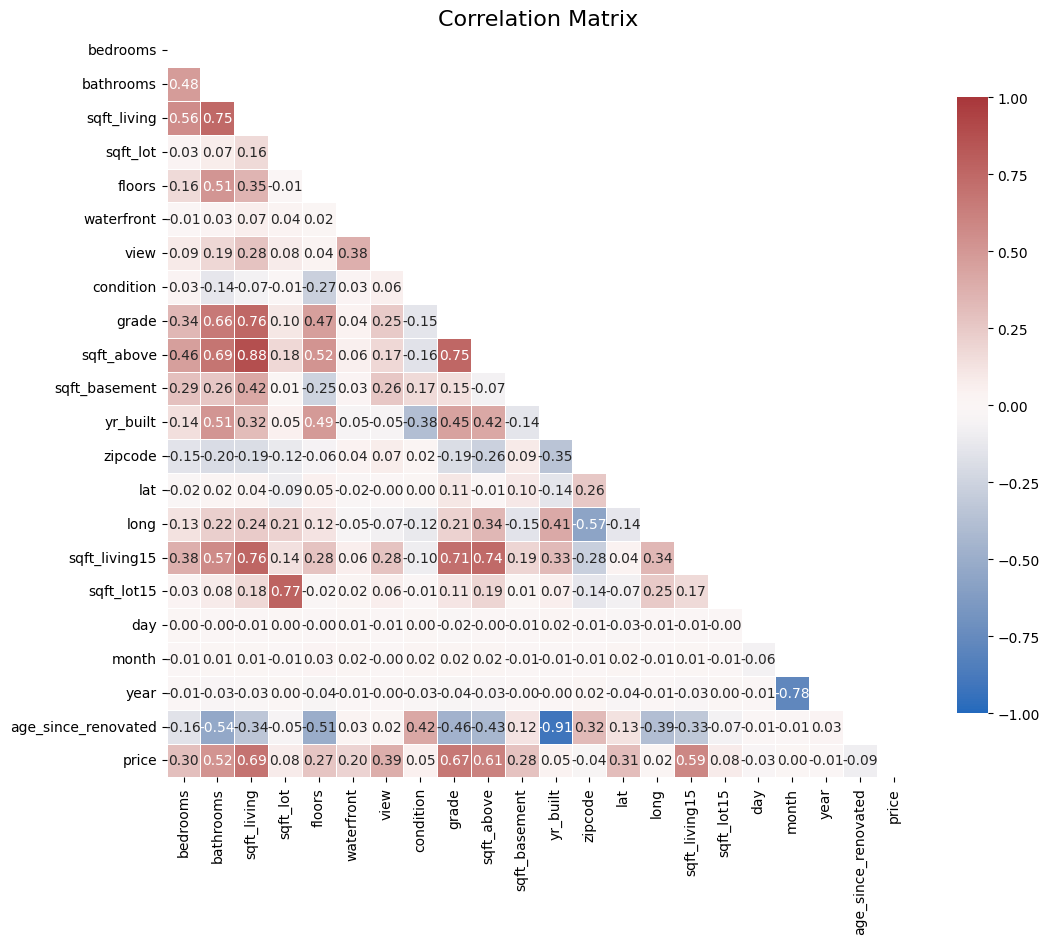

             bedrooms  bathrooms  sqft_living  sqft_lot    floors  waterfront  \
bedrooms     1.000000   0.484003     0.561627  0.025321  0.164536   -0.011420   
bathrooms    0.484003   1.000000     0.749852  0.071261  0.510925    0.026924   
sqft_living  0.561627   0.749852     1.000000  0.164651  0.354314    0.067505   
sqft_lot     0.025321   0.071261     0.164651  1.000000 -0.013066    0.035171   
floors       0.164536   0.510925     0.354314 -0.013066  1.000000    0.015261   

                 view  condition     grade  sqft_above  ...   zipcode  \
bedrooms     0.086933   0.027444  0.338616    0.462793  ... -0.151735   
bathrooms    0.186133  -0.139804  0.663571    0.685121  ... -0.198928   
sqft_living  0.281220  -0.065189  0.757528    0.878699  ... -0.193850   
sqft_lot     0.078483  -0.013092  0.101992    0.176956  ... -0.124270   
floors       0.035545  -0.266865  0.465624    0.521707  ... -0.059987   

                  lat      long  sqft_living15  sqft_lot15       day  \
be

In [142]:
corr_matrix = norm_train.corr()

import seaborn as sns
import matplotlib.pyplot as plt
# Compute the correlation matrix
corr_matrix = norm_train.corr()

# Create a mask to hide the upper triangle (since it's symmetric)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the figure size
plt.figure(figsize=(12, 10))

# Draw the heatmap with annotations and mask
sns.heatmap(corr_matrix,
            mask=mask,
            annot=True,      # Display correlation values
            fmt=".2f",       # Format numbers with 2 decimal places
            cmap='vlag',     # Color map for better contrast
            vmin=-1, vmax=1, # Set color scale from -1 to 1
            cbar_kws={"shrink": .8}, # Adjust color bar size
            linewidths=0.5,  # Add spacing between cells
            square=True)     # Keep cells square for visual consistency

plt.title('Correlation Matrix', size=16)
plt.show()

print(corr_matrix.head())

### **Questions**

Ideally, we would like the weight coefficients to be stable across different runs, as this increases confidence in the model's reliability. Do highly correlated features tend to exhibit more instability in their weights across different training sets compared to less correlated features? Discuss any trend you observe based on the variance of the weight coefficients. How does the stability of these features relate to the multicollinearity issue present in this dataset?


**Your answer goes here.**

###1. Do highly correlated features tend to exhibit more instability in their weights across different training sets compared to less correlated features?

- Highly correlated features often exhibit more instability in their weights across different training sets compared to less correlated features.
- This is because when features are highly correlated, the model struggles to distinguish their individual contributions to the target variable. Small changes in the training data can lead to significant shifts in how the model allocates weights among these correlated features.

- In the data, we can see high correlations between:

  - sqft_living and sqft_above (0.88)
  - bathrooms and sqft_living (0.75)
  - bathrooms and sqft_above (0.69)

  - These features are likely contributing to the instability observed in their corresponding weights.
  - For example, sqft_above has a high variance in its weight (0.005732), and this feature is strongly correlated with sqft_living and bathrooms.

- This suggests instability in how the model is distributing importance among these features.

### 2. Discuss any trend you observe based on the variance of the weight coefficients.

- A trend can be seen when comparing the variance of the weight coefficients with their correlations. Features that are more correlated with each other tend to exhibit higher variances in their weights. For instance:

  - sqft_above (variance: 0.005732) is highly correlated with sqft_living and bathrooms, and both these features also have relatively high weight variances (sqft_living: 0.003264, bathrooms: 0.002767).
  - On the other hand, features like zipcode, which are less correlated with other features (low correlations), have lower weight variances (variance: 0.000160).

- This suggests that multicollinearity between features likely increases the instability of the weight coefficients.


###3. How does the stability of these features relate to the multicollinearity issue present in this dataset?

- The instability in the weights, especially for highly correlated features, is a direct manifestation of multicollinearity.
- When multicollinearity exists, the model cannot uniquely assign the effect of a change in the target variable to any single feature, leading to variability in the assigned weights across different training sets.
- This is why highly correlated features like sqft_living, sqft_above, and bathrooms have higher variances in their weights.

- Multicollinearity inflates the variance of the estimated coefficients, making them less stable.

# Bonus. In-class competition (5 bonus pts)

We will host a in-class competition using the IA1 data, where you are encouraged to explore different ways to improve the prediction performance by manipunating the data. This could include: feature engineering such as removing, transforming features, constructing new features based on existing ones, using different encoding for the discrete features; data manipulation such as identifying and removing potential outliers; and target manipulation such as log transforming the price target. This is where you can get creative and test your ideas out.

To participate in this competition, use the following link:
https://www.kaggle.com/t/7a885211273e48968e3a5f1b556cb685

You should continue working in the same team for this competition. The training and validation data provided on the kaggle site are the same as the IA1 assignment. To participate, you will need to train your model and apply it to testing data provided on kaggle, and submit prediction files to be scored.

Your scoring will have two parts, the performance on the public leader board as well as the private leader board. The results on the public leader board is visible through out the competition so that you can gauge how well your model is performing in comparison to others. The private leader board shows the final evaluation performance and will be released only once after the competition is closed.

Each team will be allowed to submit 3 final entries to be evaluated. You can use the public leaderboard performance to pick which models to use for your final evaluation entries.

**Assginment of the bonus points:**

**Performance bonus:** the top 3 teams on the **private** leader board will recieve 5 bonus points.

**Participation bonus:** the 5 teams that submitted the most entries (with different performances) will recieve 3 bonus points. Also any team that participated the competition and got non-trivial performance will receive 2 bonus points.

Bonus points are capped at 5.


**Please provide the team name on the kaggle competition here _________.
Leave it blank if you opt not to participate.**

In [146]:
#running this code block will convert this notebook and its outputs into a pdf report.
!jupyter nbconvert --to html /content/gdrive/MyDrive/AI534/lab1/IA1-2024_Final.ipynb  # you might need to change this path to appropriate value to location your copy of the IA0 notebook

input_html = '/content/gdrive/MyDrive/AI534/lab1/IA1-2024_Final.html' #you might need to change this path accordingly
output_pdf = '/content/gdrive/MyDrive/AI534/lab1/IA1output.pdf' #you might need to change this path or name accordingly

# Convert HTML to PDF
pdfkit.from_file(input_html, output_pdf)

# Download the generated PDF
files.download(output_pdf)

[NbConvertApp] Converting notebook /content/gdrive/MyDrive/AI534/lab1/IA1-2024_Final.ipynb to html
[NbConvertApp] Writing 1142823 bytes to /content/gdrive/MyDrive/AI534/lab1/IA1-2024_Final.html


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>